<a href="https://colab.research.google.com/github/Hani1-2/DeepLearningAssignmnt/blob/master/ModelTuning_CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Data

In [2]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow.keras as keras

# path to json file that stores MFCCs and genre labels for each processed segment
DATA_PATH = "/content/drive/MyDrive/FYP/Modelling_folder/data_surah_1_spect_40.json"

def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Plot History

In [3]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

# Prepare Dataset

In [4]:
def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.
    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split
    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


# Build Model

In [12]:
def build_model(input_shape):
    """Generates CNN model
    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.Dropout(0.2))
    # model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(64, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.Dropout(0.2))
    # model.add(keras.layers.BatchNormalization())

    # # 3rd conv layer
    model.add(keras.layers.Conv2D(128, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dropout(0.2))

    # output layer
    model.add(keras.layers.Dense(28, activation='softmax'))

    return model

In [13]:
def predict(model, X, y):
    """Predict a single sample using the trained model
    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))


In [14]:
# get train, validation, test splits
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)
# create network
input_shape = (X_train.shape[1], X_train.shape[2], 1)

Data succesfully loaded!


In [15]:
X_train.shape

(67248, 9, 40, 1)

(9, 40, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 8, 39, 32)         160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 20, 32)        0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 4, 20, 32)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 19, 64)         8256      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 10, 64)        0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 2, 10, 

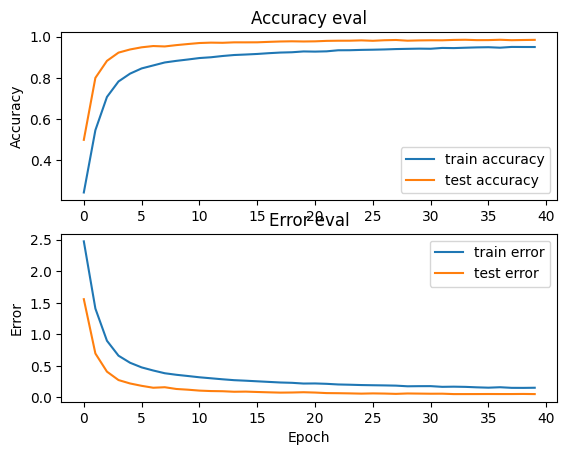

876/876 - 2s - loss: 0.0572 - accuracy: 0.9834 - 2s/epoch - 2ms/step

Test accuracy: 0.9834052920341492
1/1 [==============================] - 0s 181ms/step
Target: 19, Predicted label: [19]


In [16]:
if __name__ == "__main__":

    
    print(input_shape)
    model = build_model(input_shape)

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=40)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    # pick a sample to predict from the test set
    X_to_predict = X_test[100]
    y_to_predict = y_test[100]

    # predict sample
    predict(model, X_to_predict, y_to_predict)


In [ ]:
SAVED_MODEL_PATH = "model_spect_cnn.h5"
model.save(SAVED_MODEL_PATH)


In [ ]:
import pandas as pd

In [ ]:
_mapping = {
    1:"Bis'mi",
    2:"Al-lahi",
    3:"Al-rahmaani",
    4:"Al-raheemi",
    5:"Alhamdu",
    6:"lillaahi",
    7:"Rabbil",
    8:"aalameen",
    9:"Ar-Rahmaan",
    10:"Ar-Raheem",
    11:"Maaliki",
    12:"Yumid",
    13:"Diin",
    14:"Iyyaka",
    15:"Na'abudu",
    16:"Iyyaka",
    17:"Nasta'een",
    18:"Ihdinas",
    19:"Siraatal",
    20:"Mustaqeem",
    21:"Siraatal",
    22:"Ladheena",
    23:"An'amta",
    24:"Alaihim",
    25:"Ghayril",
    26:"Maghdubi",
    27:"Alaihim",
    28:"Wala al-dalina"}

In [ ]:
SAMPLE_RATE = 22050
TRACK_DURATION = 2 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
file = '/content/003.wav'

def save_mfcc(file_path,num_mfcc=13, n_fft=2048, hop_length=512, num_segments=10):
    mfcc_lst = []
    # we divide the track into 5 segments
    # to calculate sample per segment - we need to know the number of samples per track (which is the sample rate * the track duration )
    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

    # process all segments of audio file
    for d in range(num_segments):

        # calculate start and finish sample for current segment
        start = samples_per_segment * d
        finish = start + samples_per_segment

        spec = librosa.stft(signal[start:finish], n_fft=2048, hop_length=512)
        spec_power = librosa.power_to_db(np.abs(spec)**2, ref=np.max)

        # extract mfcc - for each segment of signal
        mfcc = librosa.feature.mfcc(S=spec_power, n_mfcc=13)
        mfcc = mfcc.T
        # store only mfcc feature with expected number of vectors
        if len(mfcc) == num_mfcc_vectors_per_segment:
            mfcc_lst.append(mfcc.tolist())
    return mfcc_lst

In [ ]:
mfc = save_mfcc('006.wav')
x= mfc[0]
y= mfc[1]
print(len(mfc))
# for i in mfc:
  # print(f'Length of one segment extraction {len(i)}')

print(len(mfc[0]))
print(len(mfc[1][0]))


4
9
13


/usr/local/lib/python3.9/dist-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1472
  return f(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=0
  return f(*args, **kwargs)


In [ ]:
x

[[-2507.055908203125,
  58.8436279296875,
  42.574241638183594,
  48.666358947753906,
  42.18589782714844,
  29.383399963378906,
  31.5981388092041,
  27.510051727294922,
  17.401960372924805,
  19.589622497558594,
  16.579408645629883,
  6.356538772583008,
  9.928887367248535],
 [-2079.439453125,
  384.4190979003906,
  121.68710327148438,
  199.00088500976562,
  60.03031539916992,
  -73.20272064208984,
  67.14350891113281,
  21.89228057861328,
  -98.42532348632812,
  31.946025848388672,
  59.482242584228516,
  -63.5679931640625,
  -20.09283447265625],
 [-1867.736328125,
  499.57501220703125,
  53.550933837890625,
  190.71197509765625,
  74.42894744873047,
  -81.75123596191406,
  69.40164184570312,
  -17.26337242126465,
  -125.25604248046875,
  75.84422302246094,
  66.09994506835938,
  -101.05113220214844,
  -20.38248634338379],
 [-1811.3792724609375,
  516.7086791992188,
  5.573942184448242,
  166.554931640625,
  70.55339813232422,
  -90.77044677734375,
  66.41963195800781,
  -21.0828

In [ ]:

import librosa
import tensorflow as tf
import numpy as np
import math
SAVED_MODEL_PATH = "model_spect_cnn.h5"
SAMPLE_RATE = 22050
TRACK_DURATION = 2 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

class _Keyword_Spotting_Service:
    """Singleton class for keyword spotting inference with trained models.

    :param model: Trained model
    """
    
    model = None
    _mapping = [
    "Bis'mi",
    "Al-lahi",
    "Al-rahmaani",
    "Al-raheemi",
    "Alhamdu",
    "lillaahi",
    "Rabbil",
    "aalameen",
    "Ar-Rahmaan",
    "Ar-Raheem",
    "Maaliki",
    "Yumid",
    "Diin",
    "Iyyaka",
    "Na'abudu",
    "Iyyaka",
    "Nasta'een",
    "Ihdinas",
    "Siraatal",
    "Mustaqeem",
    "Siraatal",
    "Ladheena",
    "An'amta",
    "Alaihim",
    "Ghayril",
    "Maghdubi",
    "Alaihim",
    "Wala al-dalina"
    ]
    _instance = None


    def predict(self, file_path):
        """

        :param file_path (str): Path to audio file to predict
        :return predicted_keyword (str): Keyword predicted by the model
        """

        # extract MFCC
        # MFCCs = np.array([[-208.88369750976562, 173.29107666015625, -13.837435722351074, 14.191682815551758, -63.53321838378906, 9.908905029296875, -34.52302932739258, -7.0630083084106445, -11.072137832641602, 7.897786617279053, 12.635082244873047, -1.260940670967102, -14.440847396850586], [-175.98480224609375, 167.88204956054688, -30.289634704589844, 16.558849334716797, -79.59504699707031, 20.788333892822266, -40.25474548339844, -13.491707801818848, -13.442451477050781, 3.592095375061035, 10.45197868347168, -4.956630706787109, -13.133575439453125], [-177.2965545654297, 140.26446533203125, -42.05194091796875, 15.591264724731445, -79.16682434082031, 35.215572357177734, -48.15814971923828, -7.50286865234375, -7.240591049194336, 2.553539276123047, 9.138029098510742, -3.4423742294311523, -6.37964391708374], [-185.95509338378906, 124.90979766845703, -38.33936309814453, 22.440292358398438, -72.64540100097656, 47.9068717956543, -48.2619514465332, 1.8480926752090454, -3.999704360961914, -0.6501009464263916, 5.425509929656982, -6.084258079528809, -1.652677059173584], [-208.18551635742188, 112.87013244628906, -27.377513885498047, 31.67277717590332, -69.78677368164062, 45.79389953613281, -52.503211975097656, 0.9649603962898254, -7.219353199005127, -0.7659001350402832, 2.2723073959350586, -12.100591659545898, 0.217118501663208], [-190.88275146484375, 135.42083740234375, -31.51664924621582, 30.064231872558594, -69.34258270263672, 30.436262130737305, -56.083526611328125, -15.316060066223145, -16.722349166870117, 1.2809876203536987, -9.884056091308594, -20.502822875976562, -3.5870373249053955], [-207.81170654296875, 148.36880493164062, -37.037811279296875, 37.063602447509766, -56.117095947265625, 16.19550132751465, -35.421043395996094, -21.73065948486328, -18.389490127563477, 2.5057411193847656, -17.75062370300293, -18.73059844970703, -5.083065509796143], [-245.4512939453125, 137.54977416992188, -36.500579833984375, 54.88190841674805, -53.14923095703125, 13.605981826782227, -8.012560844421387, -28.28583526611328, -8.899959564208984, -3.0852625370025635, -13.78553581237793, -14.101425170898438, -10.775411605834961], [-236.1332244873047, 140.26885986328125, -4.87683629989624, 55.43954086303711, -48.025421142578125, 16.675363540649414, 1.0351996421813965, -34.397491455078125, -10.365550994873047, -0.5815303325653076, -10.888479232788086, -3.4156363010406494, -5.683342933654785]])
        # MFCCs = np.array(save_mfcc(file_path))
        mfc = save_mfcc(file_path)
        x= mfc[0]
        y= mfc[1]
        MFCCs = np.array(y)
        # we need a 4-dim array to feed to the model for prediction: (# samples, # time steps, # coefficients, 1)
        MFCCs = MFCCs[np.newaxis, ..., np.newaxis]

        # get the predicted label
        predictions = self.model.predict(MFCCs) # a 2d array [[]]
        predicted_index = np.argmax(predictions)
        # index return the index which has highest score
        predicted_keyword = self._mapping[predicted_index]
        # print('prediction',predicted_index,predicted_keyword)
        return predicted_keyword


    def preprocess(self, file_path, num_mfcc=13, n_fft=2048, hop_length=512,num_segments=5):
        mfcc_lst = []
        # load audio file and slice it to ensure length consistency among different files
        audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast') 

        # Compute spectrogram
        spec = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length)

        # Convert to power spectrogram
        spec_power = librosa.power_to_db(np.abs(spec)**2, ref=np.max)

        mfccs_features = librosa.feature.mfcc(S=spec_power, n_mfcc=13)
        mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
        mffccs = mfccs_scaled_features.tolist()
        mfcc_lst.append(mffccs)
        return mfcc_lst


def Keyword_Spotting_Service():
    """Factory function for Keyword_Spotting_Service class.

    :return _Keyword_Spotting_Service._instance (_Keyword_Spotting_Service):
    """

    # ensure an instance is created only the first time the factory function is called
    if _Keyword_Spotting_Service._instance is None:
        _Keyword_Spotting_Service._instance = _Keyword_Spotting_Service()
        _Keyword_Spotting_Service.model = tf.keras.models.load_model(SAVED_MODEL_PATH)
    return _Keyword_Spotting_Service._instance


if __name__ == "__main__":

    # create 2 instances of the keyword spotting service
    kss = Keyword_Spotting_Service()
    kss1 = Keyword_Spotting_Service()

    # check that different instances of the keyword spotting service point back to the same object (singleton)
    assert kss is kss1

    # make a prediction
    keyword = kss.predict("380.wav")
    print(keyword)

/usr/local/lib/python3.9/dist-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=0
  return f(*args, **kwargs)


1/1 [==============================] - 0s 101ms/step
Alhamdu


In [ ]:
import json
with open("/content/drive/MyDrive/FYP-Code/data_surah_1_spect.json") as fp:
    data = json.load(fp)
    print(len(data['mfcc'][0][0]))

13


In [ ]:
print(data['mfcc'][0])

[[-1617.0831298828125, 356.81500244140625, 42.20360565185547, 127.14744567871094, 31.06903839111328, 37.66044616699219, 7.930259704589844, 69.84143829345703, 52.040443420410156, 8.817476272583008, 41.67535400390625, 38.18476104736328, 18.2706298828125], [-1344.205078125, 234.70086669921875, -72.42889404296875, 142.79278564453125, 34.36305236816406, 50.02061462402344, -21.355243682861328, 50.469810485839844, 31.13153076171875, 52.41215515136719, 43.89302062988281, 24.152965545654297, 1.8852910995483398], [-1229.3067626953125, 81.13493347167969, -148.42660522460938, 132.7469482421875, 19.93075942993164, 92.7179183959961, -24.369312286376953, 60.66669464111328, 15.434642791748047, 58.215538024902344, 39.374996185302734, 18.01659393310547, -3.4350860118865967], [-1198.5491943359375, 8.428567886352539, -183.18862915039062, 103.76251220703125, 6.750552177429199, 78.76371765136719, -31.91216468811035, 47.861270904541016, -1.6051545143127441, 42.336883544921875, 26.254680633544922, 23.33804702

In [ ]:
import json
with open("/content/drive/MyDrive/FYP-Code/data_spect_mfcc.json") as fp:
    data = json.load(fp)
    print(len(data['MFCCs'][0]))

13


In [ ]:
!pip install librosa==0.9.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.1/213.1 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 73.5 MB/s eta 0:00:00
  Attempting uninstall: librosa
    Found existing installation: librosa 0.10.0.post2
    Uninstalling librosa-0.10.0.post2:
      Successfully uninstalled librosa-0.10.0.post2


In [ ]:
import librosa
import numpy as np

In [ ]:
def preprocess(file_path, num_mfcc=13, n_fft=2048, hop_length=512,num_segments=5):
        mfcc_lst = []
        # load audio file and slice it to ensure length consistency among different files
        audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast') 

        # Compute spectrogram
        spec = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length)

        # Convert to power spectrogram
        spec_power = librosa.power_to_db(np.abs(spec)**2, ref=np.max)

        mfccs_features = librosa.feature.mfcc(S=spec_power, n_mfcc=13)
        mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
        mffccs = mfccs_scaled_features.tolist()
        mfcc_lst.append(mffccs)
        return mfcc_lst
print(preprocess('/content/002.wav'))

[[-2013.4505615234375, 387.5789794921875, -45.34129333496094, 28.32706642150879, 100.4990463256836, 14.555423736572266, 51.982200622558594, 56.059661865234375, -39.0953254699707, -9.492719650268555, 43.04741287231445, -12.159852027893066, -31.889345169067383]]
